## Imports

In [25]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
  Using cached narwhals-1.31.0-py3-none-any.whl.metadata (11 kB)
   ---------------------------------------- 14.8/14.8 MB 25.2 MB/s eta 0:00:00
Using cached narwhals-1.31.0-py3-none-any.whl (313 kB)
Defaulting to user installation because normal site-packages is not writeable
  Using cached plotly-6.0.1-py3-none-any.whl (14.8 MB)
  Using cached narwhals-1.31.0-py3-none-any.whl (313 kB)
Note: you may need to restart the kernel to use updated packages.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.

[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import kagglehub
import shutil

C:\Users\Ranesh RK\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [26]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [27]:
%matplotlib inline

## Download Dataset

In [14]:
path = kagglehub.dataset_download("kartik2112/fraud-detection")

In [6]:
destination_path = r"C:\Users\Ranesh RK\Downloads\fraud_detection\datasets"

for file_name in os.listdir(path):
    source_file = os.path.join(path, file_name)
    destination_file = os.path.join(destination_path, file_name)
    
    if os.path.isfile(source_file):
        shutil.move(source_file, destination_file)

print("All files moved successfully!")

All files moved successfully!


## Basic Information

In [7]:
train_df = pd.read_csv(destination_path + "/fraudTrain.csv")
test_df = pd.read_csv(destination_path + "/fraudTest.csv")

In [8]:
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (1296675, 23)
Test set shape: (555719, 23)


In [9]:
print("\nMissing values in training set:")
print(train_df.isnull().sum())


Missing values in training set:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [10]:
print("\nBasic statistics of the numerical features:")
print(train_df.describe())


Basic statistics of the numerical features:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std   

In [11]:
fraud_percentage = train_df['is_fraud'].mean() * 100
print(f"\nFraud transactions percentage: {fraud_percentage:.2f}%")


Fraud transactions percentage: 0.58%


## Visualizations

In [12]:
def plot_distribution(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue='is_fraud', bins=30, kde=True, alpha=0.7)
    plt.title(f'{title} Distribution by Fraud Status')
    plt.tight_layout()
    plt.show()

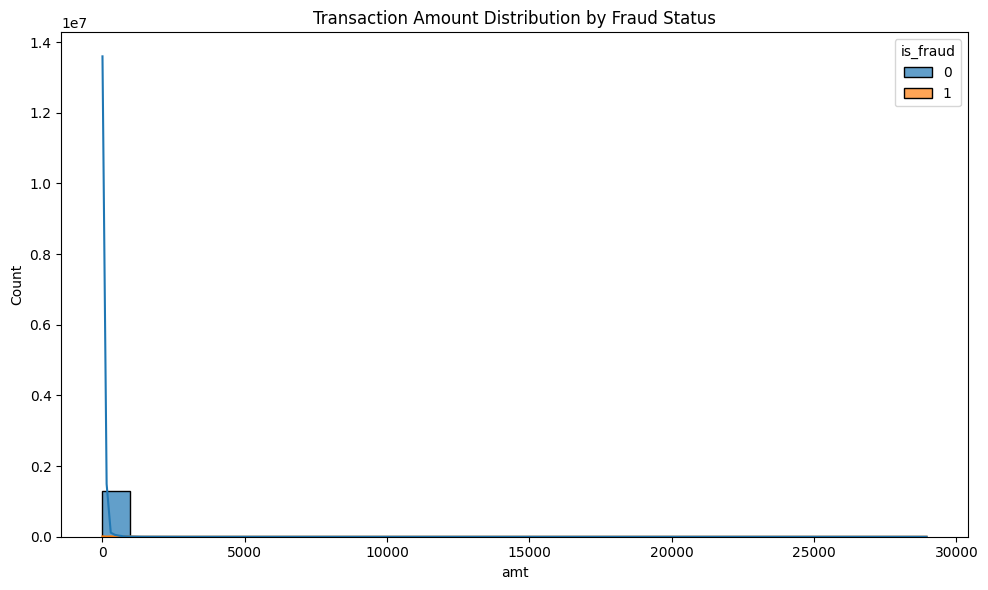

In [15]:
# Plot the distribution of transaction amounts
plot_distribution(train_df, 'amt', 'Transaction Amount')

In [16]:
# Time-based features for better analysis
train_df['trans_date_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['hour'] = train_df['trans_date_time'].dt.hour
train_df['day'] = train_df['trans_date_time'].dt.day
train_df['month'] = train_df['trans_date_time'].dt.month
train_df['dayofweek'] = train_df['trans_date_time'].dt.dayofweek

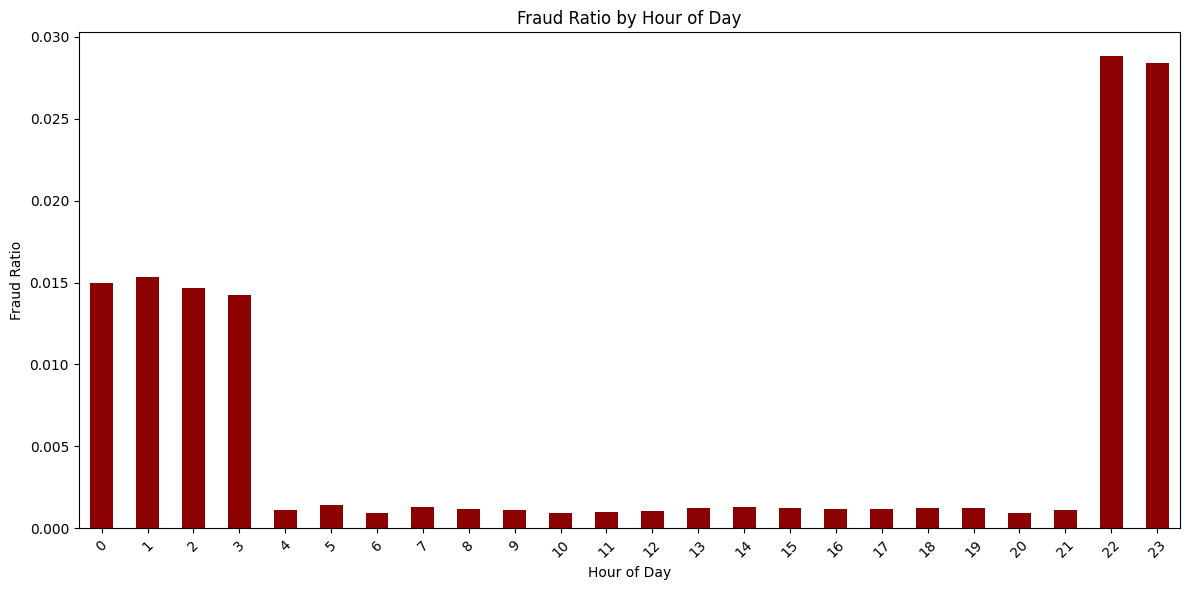

In [17]:
#Plot the fraud ratio by hour of day
plt.figure(figsize=(12, 6))
fraud_by_hour = train_df.groupby(['hour', 'is_fraud']).size().unstack().fillna(0)
fraud_ratio_by_hour = fraud_by_hour[1] / (fraud_by_hour[0] + fraud_by_hour[1])

ax = fraud_ratio_by_hour.plot(kind='bar', color='darkred')
plt.title('Fraud Ratio by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

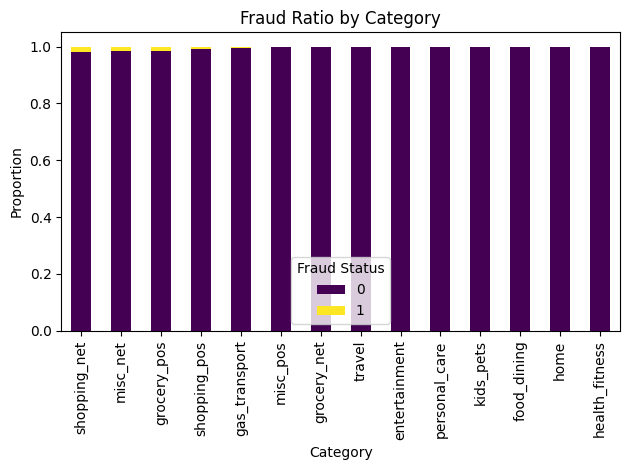

In [18]:
#plot the fraud ratio by category
plt.figure(figsize=(14, 8))
category_fraud = pd.crosstab(train_df['category'], train_df['is_fraud'], normalize='index')
category_fraud.sort_values(by=1, ascending=False).plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Fraud Ratio by Category')
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Fraud Status')
plt.tight_layout()
plt.show()

In [19]:
#print the transaction amount by fraud status
amount_stats = train_df.groupby('is_fraud')['amt'].agg(['mean', 'median', 'min', 'max']).reset_index()
print("\nTransaction amount statistics by fraud status:")
print(amount_stats)


Transaction amount statistics by fraud status:
   is_fraud        mean   median   min       max
0         0   67.667110   47.280  1.00  28948.90
1         1  531.320092  396.505  1.06   1376.04


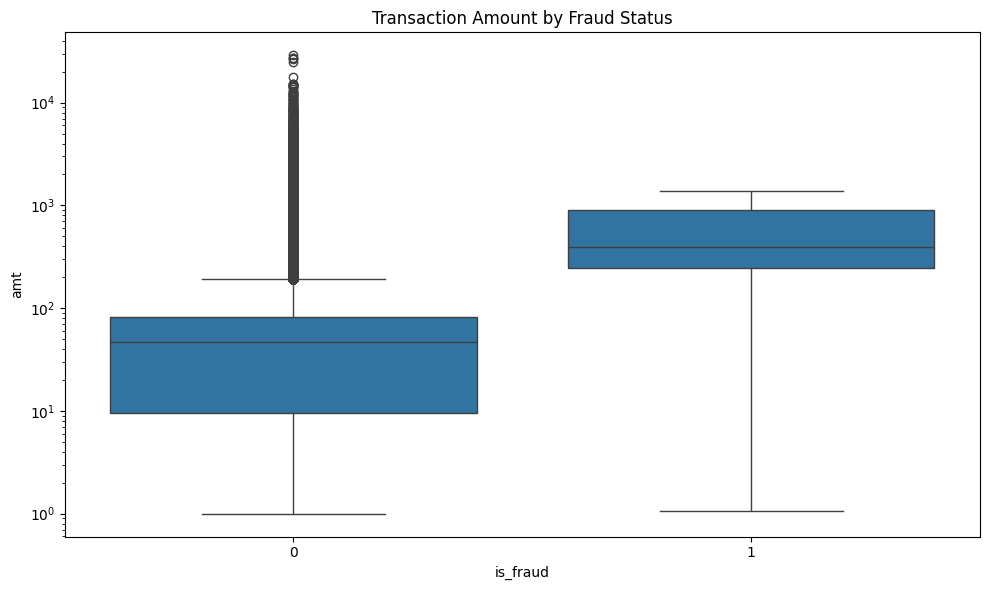

In [20]:
#plot the transaction amount by fraud status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=train_df)
plt.title('Transaction Amount by Fraud Status')
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

In [29]:
# Geographical analysis - a map of transactions
# Sample 20,000 transactions for better visualization performance
map_sample = train_df.sample(min(10000, len(train_df)))

In [37]:
fig = px.scatter_mapbox(
    map_sample,
    lat='lat',
    lon='long',
    color='is_fraud',
    color_continuous_scale=['blue', 'red'],
    size='amt',
    hover_name='city',
    hover_data=['amt', 'category'],
    zoom=3,
    title='Transaction Locations (Sample)'
)
fig.update_layout(mapbox_style='open-street-map', height=600)
fig.show()

C:\Users\Ranesh RK\AppData\Local\Temp\ipykernel_7304\1236453766.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



### Haversine distance
The Haversine formula is a way to calculate the distance between two points on the surface of a sphere (like Earth) using their latitude and longitude coordinates. 

#### Formula
- a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2) 
- c = 2 ⋅ atan2( √a, √(1−a) )
- d = R ⋅ c

#### Where:
- φ is latitude, λ is longitude,
- Δφ is the difference in latitude,
- Δλ is the difference in longitude,
- R is the radius of the sphere (e.g., Earth's radius),
- c is the angular distance in radians,
- d is the distance in the same unit as R 

In [38]:
#function to calculate the distance between customer and merchant
def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

In [40]:
#add new column for distance between customer and merchant
train_df['distance_km'] = haversine_distance(
    train_df['lat'], 
    train_df['long'],
    train_df['merch_lat'],
    train_df['merch_long']
)

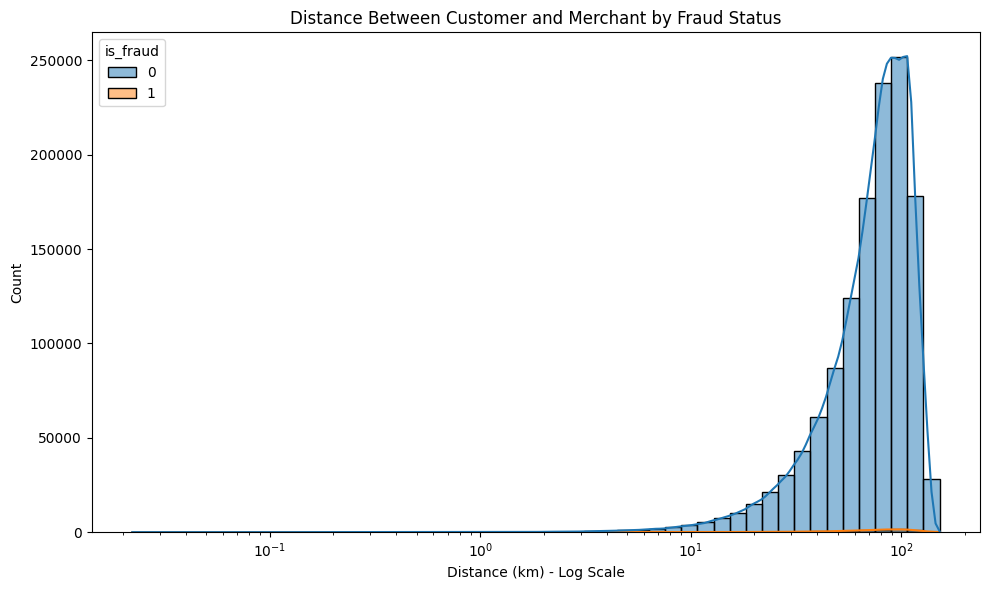

In [41]:
#plot the distance between customer and merchant by fraud status
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='distance_km', hue='is_fraud', bins=50, kde=True, log_scale=True)
plt.title('Distance Between Customer and Merchant by Fraud Status')
plt.xlabel('Distance (km) - Log Scale')
plt.tight_layout()
plt.show()

In [42]:
train_df['dob'] = pd.to_datetime(train_df['dob'])
train_df['age'] = (pd.to_datetime('2019-01-01') - train_df['dob']).dt.days / 365.25

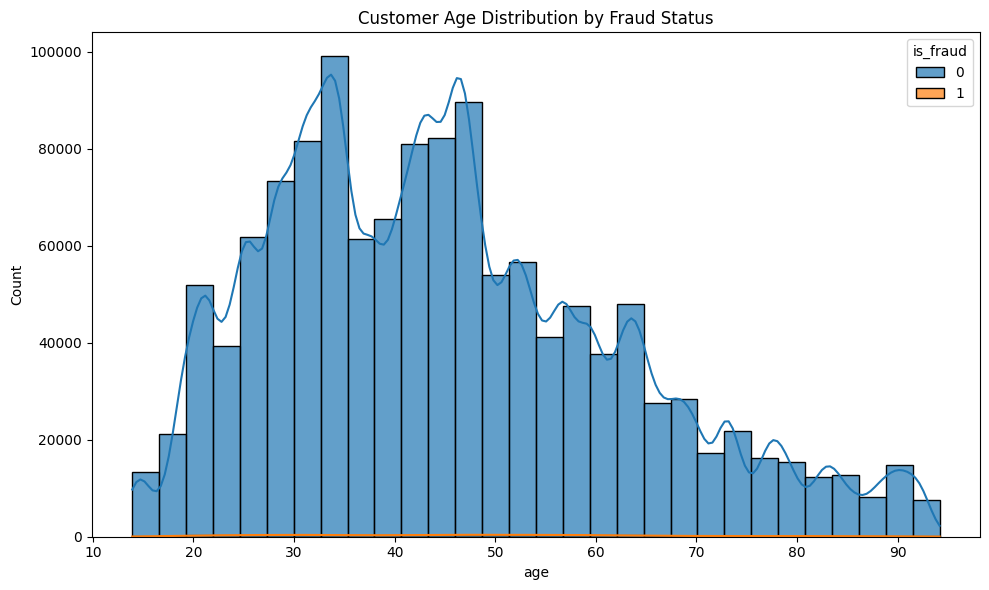

In [44]:
#plot the age distribution by fraud status
plot_distribution(train_df, 'age', 'Customer Age')

In [45]:
#plot the correlation matrix of numerical features
numerical_cols = ['amt', 'distance_km', 'age', 'hour', 'day', 'month', 'city_pop']
corr_matrix = train_df[numerical_cols + ['is_fraud']].corr()

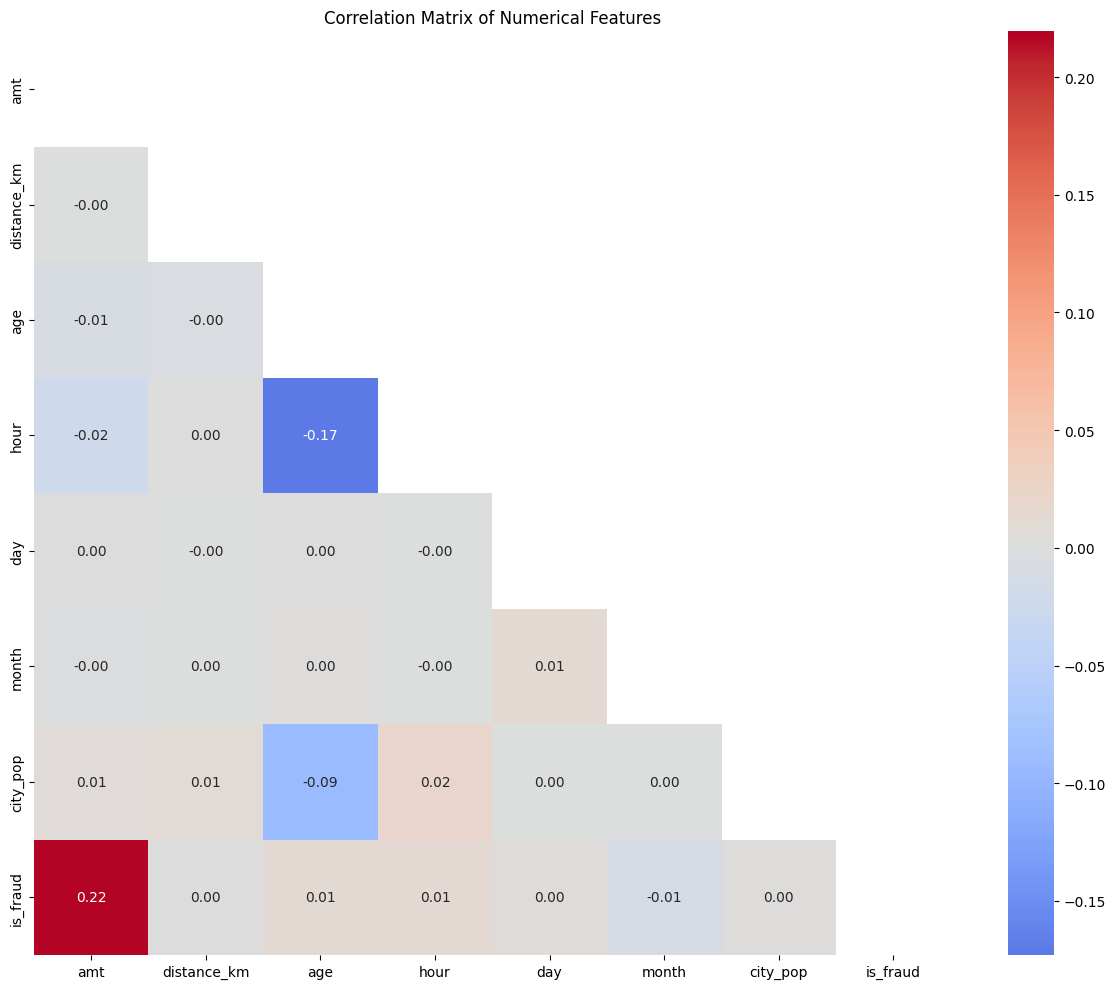

In [46]:
#plot the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [47]:
#apply changes to test_df
test_df['trans_date_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['hour'] = test_df['trans_date_time'].dt.hour
test_df['day'] = test_df['trans_date_time'].dt.day
test_df['month'] = test_df['trans_date_time'].dt.month
test_df['dayofweek'] = test_df['trans_date_time'].dt.dayofweek

test_df['distance_km'] = haversine_distance(
    test_df['lat'], 
    test_df['long'],
    test_df['merch_lat'],
    test_df['merch_long']
)

test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['age'] = (pd.to_datetime('2019-01-01') - test_df['dob']).dt.days / 365.25

## Add extra features to df

In [48]:
#function to extract detailed time features
def extract_time_features(df):
    # Weekend/Weekday flag
    df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)
    
    # Time of day categories
    df['time_period'] = pd.cut(
        df['hour'],
        bins=[0, 6, 12, 18, 24],
        labels=['night', 'morning', 'afternoon', 'evening'],
        include_lowest=True
    )
    
    # Transaction recency (using unix_time)
    df['unix_time'] = pd.to_numeric(df['unix_time'])
    df['transaction_recency'] = df['unix_time'].max() - df['unix_time']
    
    return df

In [49]:
train_df = extract_time_features(train_df)
test_df = extract_time_features(test_df)

In [50]:
#calculate the merchant risk
merchant_risk = train_df.groupby('merchant')['is_fraud'].agg(['mean', 'count']).reset_index()
merchant_risk.columns = ['merchant', 'merchant_fraud_rate', 'merchant_transaction_count']

In [51]:
#merge the merchant risk with the train and test data
train_df = train_df.merge(merchant_risk, on='merchant', how='left')
test_df = test_df.merge(merchant_risk, on='merchant', how='left')

In [57]:
#fill the missing values with the mean of the fraud rate and transaction count
train_df['merchant_fraud_rate'] = train_df['merchant_fraud_rate'].fillna(train_df['is_fraud'].mean())
test_df['merchant_fraud_rate'] = test_df['merchant_fraud_rate'].fillna(train_df['is_fraud'].mean())
train_df['merchant_transaction_count'] = train_df['merchant_transaction_count'].fillna(1)
test_df['merchant_transaction_count'] = test_df['merchant_transaction_count'].fillna(1)

In [58]:
#calculate the category risk
category_risk = train_df.groupby('category')['is_fraud'].agg(['mean', 'count']).reset_index()
category_risk.columns = ['category', 'category_fraud_rate', 'category_transaction_count']

In [59]:
train_df = train_df.merge(category_risk, on='category', how='left')
test_df = test_df.merge(category_risk, on='category', how='left')

In [ ]:
#fill the missing values with the mean of the fraud rate and transaction count
train_df['category_fraud_rate'] = train_df['category_fraud_rate'].fillna(train_df['is_fraud'].mean())
test_df['category_fraud_rate'] = test_df['category_fraud_rate'].fillna(train_df['is_fraud'].mean())
train_df['category_transaction_count'] = train_df['category_transaction_count'].fillna(1)
test_df['category_transaction_count'] = test_df['category_transaction_count'].fillna(1)

In [61]:
#calculate the customer average amount
customer_avg_amt = train_df.groupby(['first', 'last', 'dob'])['amt'].mean().reset_index()
customer_avg_amt.columns = ['first', 'last', 'dob', 'customer_avg_amount']

In [62]:
train_df = train_df.merge(customer_avg_amt, on=['first', 'last', 'dob'], how='left')
test_df = test_df.merge(customer_avg_amt, on=['first', 'last', 'dob'], how='left')

In [64]:
#fill the missing values with the mean of the amount
train_df['customer_avg_amount'] =  train_df['customer_avg_amount'].fillna(train_df['amt'].mean())
test_df['customer_avg_amount'] = test_df['customer_avg_amount'].fillna(train_df['amt'].mean())

#calculate the amount ratio
train_df['amount_ratio'] = train_df['amt'] / train_df['customer_avg_amount']
test_df['amount_ratio'] = test_df['amt'] / test_df['customer_avg_amount']

## Save new dataset

In [66]:
train_df.to_csv('train_df.csv', index=False)
test_df.to_csv('test_df.csv', index=False)

In [68]:
shutil.move("train_df.csv", destination_path)
shutil.move("test_df.csv", destination_path)

'C:\\Users\\Ranesh RK\\Downloads\\fraud_detection\\datasets\\test_df.csv'